# Lab | Avila Bible 

In this lab, we will explore the [**Avila Bible dataset**](https://archive.ics.uci.edu/ml/datasets/Avila) which has been extracted from 800 images of the 'Avila Bible', an XII century giant Latin copy of the Bible. The prediction task consists in associating each pattern to a copyist. You will use supervised learning algorithms to figure out what feature patterns each copyist are likely to have and use our model to predict those copyist.

-----------------------------------------------------------------------------------------------------------------

## Before your start:
    - Read the README.md file,
    - Comment as much as you can and use the APIla-bible in the README.md,
    - Happy learning!

In [30]:
# Import your libraries
import pandas as pd
import requests
import seaborn as sns

![machine-learning](https://miro.medium.com/proxy/1*halC1X4ydv_3yHYxKqvrwg.gif)

The Avila data set has been extracted from 800 images of the the **Avila Bible**, a giant Latin copy of the whole Bible produced during the XII century between Italy and Spain. The palaeographic analysis of the  manuscript has  individuated the presence of 8 copyists. The pages written by each copyist are not equally numerous. 
Each pattern contains 10 features and corresponds to a group of 4 consecutive rows.

## What am I expected to do?

Well, your prediction task consists in associating each pattern to one of the 8 monks we will be evaluating (labeled as:  Marcus, Clarius, Philippus, Coronavirucus, Mongucus, Paithonius, Ubuntius, Esequlius). For that aim, you should: 
- Train a minimum of 4 different models
- Perform a minimum of 4 Feature Extraction and Engineering techniques
- Must contain a summary of the machine learning tools and algorithms
- and the results or the score obtained with each of them

You won't get much more instructions from now on. Remember to comment your code as much as you can. Keep the requirements in mind and have fun! 

Just one last piece of advice, take a moment to explore the data, remember this dataset contains two files: **train** and **test**. You will find both files in `data` folder. The **test** files contains the data you will predict for, therefore it does not include the labels.
Use the **train** dataset as you wish, but don't forget to split it into **train** and **test** again so you can evaluate your models. Just be sure to train it again with the whole data before predicting.
We have also included a **sample submission** which is of the exact shape and format you must use when evaluating your predictions against the groundtruth through the `APIla-bible`. It won't work unless it is the exact same shape. 



#### Train dataset

In [14]:
train_dataset = pd.read_csv('../data/training_dataset.csv', index_col=0)

In [16]:
train_dataset.head(20)

,0,1,2,3,4,5,6,7,8,9,10
0,0.241386,0.109171,-0.127126,0.380626,0.172340,0.314889,0.484429,0.316412,0.188810,0.134922,Marcus
1,0.303106,0.352558,0.082701,0.703981,0.261718,-0.391033,0.408929,1.045014,0.282354,-0.448209,Clarius
2,-0.116585,0.281897,0.175168,-0.152490,0.261718,-0.889332,0.371178,-0.024328,0.905984,-0.877830,Philippus
3,-0.326430,-0.652394,0.384996,-1.694222,-0.185173,-1.138481,-0.232828,-1.747116,-1.183175,-0.807380,Philippus
4,-0.437525,-0.471816,0.463236,-0.545248,0.261718,-0.972381,0.824183,-3.108388,-2.991700,-1.141030,Philippus
5,-0.412837,-0.346197,0.601936,2.211191,0.440474,0.356414,-1.138838,1.623671,2.371513,1.346221,Mongucus
6,0.056229,0.187683,-0.031104,-0.958476,0.261718,-0.598658,0.861934,-0.885246,-0.528364,-0.848946,Clarius
7,-0.128929,-0.032150,0.068476,-0.151655,-0.989576,-0.806282,0.295677,0.259758,0.251173,-0.767984,Clarius
8,0.130292,-0.275537,0.274747,-0.574878,0.261718,2.889429,0.635431,-1.180749,-0.840179,2.303929,Marcus
9,0.080916,0.438921,0.143160,-0.523288,0.261718,-0.598658,0.106925,-0.641641,0.188810,-0.491704,Ubuntius


#### Test dataset


In [19]:
test_dataset = pd.read_csv('../data/test_dataset.csv', index_col=0)

In [20]:
test_dataset.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.017834,0.132725,0.125378,1.357345,0.261718,0.190314,0.182426,0.445253,-0.715453,0.189796
1,-0.202992,-0.000745,-3.210528,-0.527256,0.082961,0.771662,0.144676,0.098572,0.251173,0.745333
2,1.019049,0.211237,-0.155578,-0.311855,0.261718,0.107265,0.484429,0.339303,-0.310094,-0.049630
3,0.451232,-0.267686,0.335206,-0.831336,0.261718,0.024215,0.220177,0.988787,0.032902,0.025485
4,-0.227680,0.109171,0.413447,0.118917,0.172340,0.480988,0.522180,0.091562,0.313536,0.256389


#### Sample submission

In [21]:
sample_submission = pd.read_csv('../data/sample_submission.csv', header=None, index_col=0)

In [22]:
sample_submission.head()

,1
0,
0,Philippus
1,Ubuntius
2,Esequlius
3,Coronavirucus
4,Philippus


`Keep calm and code on!`

# Challenge - train your models, make the best prediction

In [24]:
train_dataset.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [25]:
train_dataset.info

<bound method DataFrame.info of               0         1         2         3         4         5         6  \
0      0.241386  0.109171 -0.127126  0.380626  0.172340  0.314889  0.484429   
1      0.303106  0.352558  0.082701  0.703981  0.261718 -0.391033  0.408929   
2     -0.116585  0.281897  0.175168 -0.152490  0.261718 -0.889332  0.371178   
3     -0.326430 -0.652394  0.384996 -1.694222 -0.185173 -1.138481 -0.232828   
4     -0.437525 -0.471816  0.463236 -0.545248  0.261718 -0.972381  0.824183   
...         ...       ...       ...       ...       ...       ...       ...   
12012  0.093260 -0.087108 -2.268081 -0.164963  0.261718  0.148790  0.333428   
12013 -0.215336  0.101320  0.235627 -0.280585  0.261718 -1.719828 -0.308329   
12014  0.031541  0.297600 -3.210528 -0.583590 -0.721442 -0.224934  0.333428   
12015  0.266074  0.580242  0.114709 -0.165469  0.261718  0.024215  0.446679   
12016  4.969080 -0.385453  0.143160 -2.600732  0.976743 -0.764757 -0.232828   

              7    

In [27]:
train_dataset.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10     object
dtype: object

In [28]:
train_dataset["10"].value_counts()

Marcus           5107
Clarius          2362
Philippus        1360
Coronavirucus    1009
Mongucus          640
Paithonius        600
Ubuntius          512
Esequlius         427
Name: 10, dtype: int64

<AxesSubplot:>

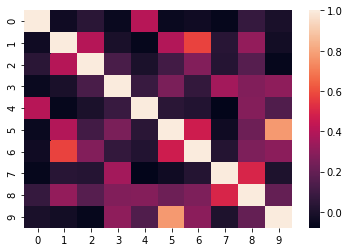

In [31]:
sns.heatmap(train_dataset.corr())

### Label encoder 
Encode target labels with value between 0 and n_classes-1.
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [32]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train_dataset["numeric"] = le.fit_transform(train_dataset["10"])

In [35]:
train_dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,numeric
0,0.241386,0.109171,-0.127126,0.380626,0.172340,0.314889,0.484429,0.316412,0.188810,0.134922,Marcus,3
1,0.303106,0.352558,0.082701,0.703981,0.261718,-0.391033,0.408929,1.045014,0.282354,-0.448209,Clarius,0
2,-0.116585,0.281897,0.175168,-0.152490,0.261718,-0.889332,0.371178,-0.024328,0.905984,-0.877830,Philippus,6
3,-0.326430,-0.652394,0.384996,-1.694222,-0.185173,-1.138481,-0.232828,-1.747116,-1.183175,-0.807380,Philippus,6
4,-0.437525,-0.471816,0.463236,-0.545248,0.261718,-0.972381,0.824183,-3.108388,-2.991700,-1.141030,Philippus,6


In [36]:
columnas = [a for a in train_dataset.columns if a not in ["10","numeric"]]
X = train_dataset[columnas]
y = train_dataset["numeric"]

### Train_Test Split
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

### Train One Model

Classifier implementing the k-nearest neighbors vote. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knc = KNeighborsClassifier()
knc.fit(X_train,y_train)
y_pred = knc.predict(X_test)

In [41]:
y_pred

array([5, 3, 3, ..., 6, 0, 0])

### Exploring metrics for multi-class classification algorithms
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [42]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

In [48]:
print ("Accuracy", round(accuracy_score(y_test,y_pred),3))
print("Precission",round(precision_score(y_test,y_pred, average = "weighted"),3))
print("Recall", round(recall_score(y_test,y_pred, average = "weighted"),3))
print("F1_score", round(f1_score(y_test,y_pred,average= "weighted"),3))

Accuracy 0.736
Precission 0.742
Recall 0.736
F1_score 0.736


### Training several models at once

In [50]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [51]:
models = {
    "tree" : DecisionTreeClassifier(),
    "forest" : RandomForestClassifier(),
    "ada": AdaBoostClassifier(),
    "decision" : SVC()
}

In [52]:
for name, model in models.items():
    print(f"Entrenando {name}")
    model.fit(X_train, y_train)
    print("He acabado :) ")


Entrenando tree
He acabado :) 
Entrenando forest
He acabado :) 
Entrenando ada
He acabado :) 
Entrenando decision
He acabado :) 


### Exploring metrics for multi-class classification algorithms
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [53]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"-------{name}-------")
    print ("Accuracy", round(accuracy_score(y_test,y_pred),3))
    print("Precission",round(precision_score(y_test,y_pred, average = "weighted"),3))
    print("Recall", round(recall_score(y_test,y_pred, average = "weighted"),3))
    print("F1_score", round(f1_score(y_test,y_pred,average= "weighted"),3))

-------tree-------
Accuracy 0.977
Precission 0.977
Recall 0.977
F1_score 0.977
-------forest-------
Accuracy 0.988
Precission 0.988
Recall 0.988
F1_score 0.987
-------ada-------
Accuracy 0.536
Precission 0.327
Recall 0.536
F1_score 0.394
-------decision-------
Accuracy 0.978
Precission 0.978
Recall 0.978
F1_score 0.977


/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Evaluate a score by cross-validation
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

In [55]:
import numpy as np
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    scores = cross_val_score(model,X,y, cv=10)
    print(f"{name} accuracy{np.mean(scores)}")


tree accuracy0.9816925302126209
forest accuracy0.9890162939646799
ada accuracy0.5186009024648067
decision accuracy0.9811097518568136


### Hyperparameter optimization with GridSearchCV
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [56]:
#Hiperparámetros tuneables de RandomForest
parameters = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [57]:
#Reducimos para hacer la prueba con diferentes n_estimators
params = {
     'n_estimators': [200, 400, 600]
}

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
rfc = RandomForestClassifier()

In [63]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [61]:
grid = GridSearchCV(rfc,params,verbose=1)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  2.9min finished


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [200, 400, 600]}, verbose=1)

In [62]:
print(grid.best_params_)

{'n_estimators': 600}


### Save the model 
- https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

## What do I do once I have a prediction?

Once you have already trained your model and made a prediction with it, you are ready to check what is the accuracy of it. 

Save your prediction as a `.csv` file.

In [12]:
#your code here

Now you are ready to know the truth! Are you good enough to call yourself a pro?

Lucky you have the ultimate **APIla-bible** which give you the chance of checking the accuracy of your predictions as many times as you need in order to become the pro you want to be. 

## How do I post my prediction to the APIla-bible?

Easy peasy! You should only fulfil the path to your prediction `.csv` and run the cell below! 

In [13]:
my_submission = "../data/sample_submission.csv"
with open(my_submission) as f:
    res = requests.post("http://apila-bible.herokuapp.com/check", files={"csv_data":f.read()})
res.json()

{'accuracy': 0.12368946580129805,
 'quote': 'Nope, not good enough. But you shall rise as the glorious phoenix from the ashes of this score and get to the top!'}

![hope-you-enjoy](https://imgs.xkcd.com/comics/machine_learning.png)